In [1]:
#   1ДЗ. взять тот же набор данных, убрать из данных iris часть точек (на которых обучаемся) 
# и убедиться что на предсказание влияют только опорные вектора

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC

In [5]:
iris = sns.load_dataset("iris")

In [7]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


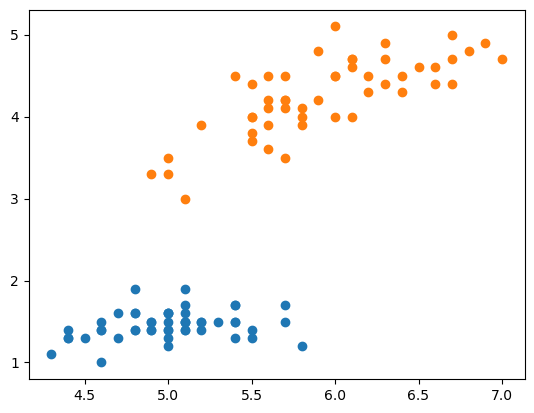

In [15]:
# Все данные 
data = iris[["sepal_length", "petal_length", "species"]]
data_df = data[(data["species"] == "setosa")| (data["species"] == "versicolor")]

X = data_df[["sepal_length", "petal_length"]]
y = data_df["species"]

data_df_seposa = data_df[data_df["species"] == "setosa"]
data_df_versicolor = data_df[data_df["species"] == "versicolor"]

plt.scatter(data_df_seposa["sepal_length"], data_df_seposa["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

plt.show()

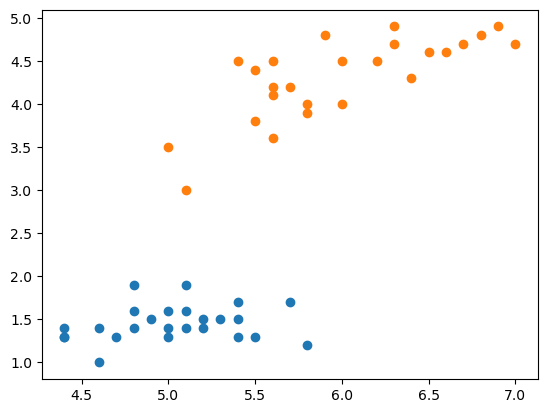

In [33]:

# Разрежение через один
X_thinned = X.iloc[::2]
y_thinned = y.iloc[::2]

data_df_thinned = data_df.iloc[::2]
data_df_setosa = data_df_thinned[data_df_thinned["species"] == "setosa"]
data_df_versicolor = data_df_thinned[data_df_thinned["species"] == "versicolor"]

plt.scatter(data_df_setosa["sepal_length"], data_df_setosa["petal_length"], label="setosa")
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"], label="versicolor")

plt.show()

[[4.8 1.9]
 [5.1 1.9]
 [5.1 3. ]]


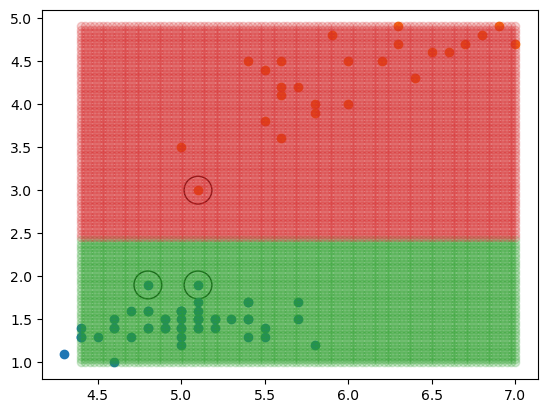

In [35]:
model = SVC(kernel='linear', C=10000)
model.fit(X_thinned, y_thinned)


print(model.support_vectors_)

plt.scatter (model.support_vectors_[:,0],
             model.support_vectors_[:,1], 
             s=400, 
             facecolor = "none",
            edgecolor="black"
            )
plt.scatter(data_df_seposa["sepal_length"], data_df_seposa["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

x1_p = np.linspace(min(data_df_thinned["sepal_length"]), max(data_df_thinned["sepal_length"]), 100)
x2_p = np.linspace(min(data_df_thinned["petal_length"]), max(data_df_thinned["petal_length"]), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p)

X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length","petal_length"] 
)

y_p = model.predict(X_p)

X_p["species"] = y_p

X_p_setosa = X_p[X_p["species"] == "setosa"]
X_p_versicolor = X_p[X_p["species"] == "versicolor"]

plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.2)
plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.2)

plt.show()